# 平安规模保费概览

将下载的平安规模保费数据合并到一起

In [124]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('data/pingan/201801_1.csv')
df2 = pd.read_csv('data/pingan/201801_2.csv')
df3 = pd.read_csv('data/pingan/201801_3.csv')

In [8]:
df1

,控股子公司名称,2018年1月累计规模保费（人民币万元）
0,中国平安财产保险股份有限公司,2742772
1,中国平安人寿保险股份有限公司,13931965
2,平安养老保险股份有限公司,192022
3,平安健康保险股份有限公司,35231


In [9]:
df2

,业务分类,2018年1月累计规模保费（人民币万元）
0,寿险业务*,NaN
1,个人寿险,13991683.0
2,新业务,3959876.0
3,续期业务,10031807.0
4,银行保险,NaN
5,新业务,NaN
6,续期业务,NaN
7,团体保险,167535.0
8,新业务,167201.0
9,续期业务,334.0


In [10]:
df3

,业务分类,2018年1月累计规模保费（人民币万元）
0,中国平安财产保险股份有限公司,NaN
1,车险,1903357.0
2,非机动车辆保险,748007.0
3,意外与健康险,91408.0
4,合计,2742772.0


# 各子公司数据(2015-)

In [80]:
def get_year_data(year, num):
    filepaths = [''.join(['data/pingan/',year,str(i).zfill(2),'_',num,'.csv']) for i in range(1, 13)]
    dfs=[pd.read_csv(i, index_col=0, header=0) for i in filepaths if os.path.exists(i)]
    df = pd.concat(dfs, axis=1).T
    dates = pd.date_range(year + '-01-01', year + '-12-31', freq='M')[:len(df)]
    df = df.set_index(dates)
    return df

In [97]:
dfs_1 = [get_year_data(i, '1') for i in ['2015','2016', '2017', '2018']]
df_1 = pd.concat(dfs_1, axis=0)
df_1_new = df_1[::-1]
df_1_new

控股子公司名称,中国平安财产保险股份有限公司,中国平安人寿保险股份有限公司,平安养老保险股份有限公司,平安健康保险股份有限公司
2018-02-28,4216539,17912661,321621,54239
2018-01-31,2742772,13931965,192022,35231
2017-12-31,21598387,45355732,1995607,238166
2017-11-30,19323442,42208365,1697223,220081
2017-10-31,17383988,39395872,1605815,201951
2017-09-30,15750696,36557191,1456301,185863
2017-08-31,13857289,33417490,1260315,159096
2017-07-31,12089382,30466616,1141488,140837
2017-06-30,10344297,27563922,1033297,114484
2017-05-31,8644099,24350745,870212,93504


## 筛选

In [98]:
df_1['2018']

控股子公司名称,中国平安财产保险股份有限公司,中国平安人寿保险股份有限公司,平安养老保险股份有限公司,平安健康保险股份有限公司
2018-01-31,2742772,13931965,192022,35231
2018-02-28,4216539,17912661,321621,54239


In [99]:
df_1['2017-01']

控股子公司名称,中国平安财产保险股份有限公司,中国平安人寿保险股份有限公司,平安养老保险股份有限公司,平安健康保险股份有限公司
2017-01-31,2371673,10574368,133318,26029


In [100]:
df_1['2017-01-31':'2017-04-30']

控股子公司名称,中国平安财产保险股份有限公司,中国平安人寿保险股份有限公司,平安养老保险股份有限公司,平安健康保险股份有限公司
2017-01-31,2371673,10574368,133318,26029
2017-02-28,3574135,14120155,289681,38355
2017-03-31,5366083,17860078,543949,59925
2017-04-30,6992377,21091893,709960,75830


## 作图

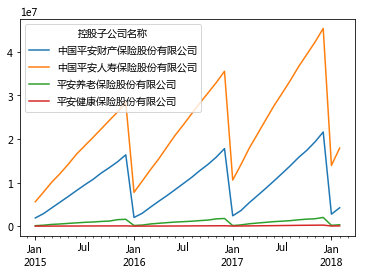

In [108]:
df_1.plot()

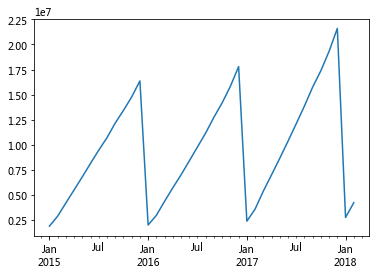

In [110]:
df_1['中国平安财产保险股份有限公司'].plot()

## 增长率

In [139]:
df1_pct = df_1.pct_change(periods=12)['2016-01-31':]
df1_pct

控股子公司名称,中国平安财产保险股份有限公司,中国平安人寿保险股份有限公司,平安养老保险股份有限公司,平安健康保险股份有限公司
2016-01-31,0.058683,0.384114,0.395943,0.281683
2016-02-29,0.028647,0.324736,0.160103,0.333395
2016-03-31,0.039305,0.283457,0.261629,0.254881
2016-04-30,0.038084,0.279740,0.324003,0.206323
2016-05-31,0.029077,0.280212,0.272138,0.192672
2016-06-30,0.028758,0.264215,0.240951,0.196720
2016-07-31,0.033380,0.262898,0.172607,0.123916
2016-08-31,0.044397,0.267970,0.190047,0.336208
2016-09-30,0.047592,0.266114,0.176886,0.385997
2016-10-31,0.056333,0.259947,0.190782,0.397837


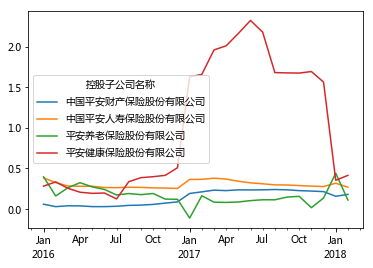

In [119]:
df1_pct.plot()

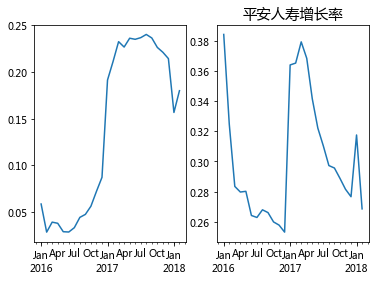

In [151]:
fig, axs = plt.subplots(1,2)

df1_pct['中国平安财产保险股份有限公司'].plot(ax=axs[0])
df1_pct['中国平安人寿保险股份有限公司'].plot(ax=axs[1])

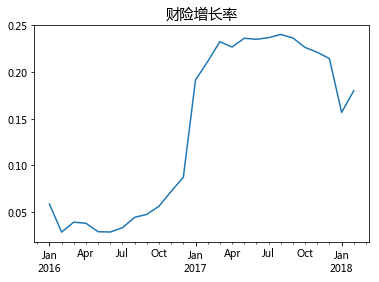

In [131]:
# plt.ylabel('增长率', fontsize='x-large')
plt.title('财险增长率', fontsize='x-large')
df1_pct['中国平安财产保险股份有限公司'].plot()

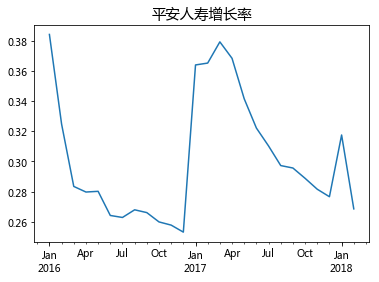

In [132]:
plt.title('平安人寿增长率', fontsize='x-large')
df1_pct['中国平安人寿保险股份有限公司'].plot()

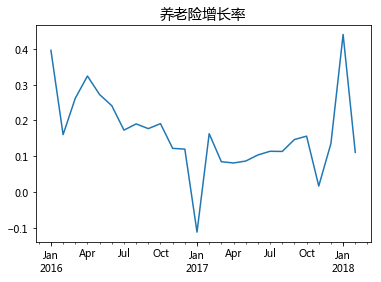

In [133]:
plt.title('养老险增长率', fontsize='x-large')
df1_pct['平安养老保险股份有限公司'].plot()

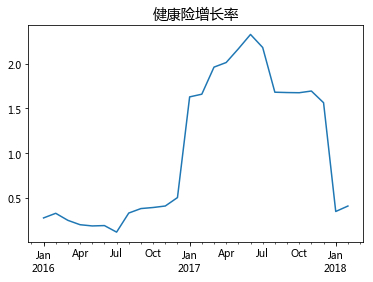

In [134]:
plt.title('健康险增长率', fontsize='x-large')
df1_pct['平安健康保险股份有限公司'].plot()

# 寿险数据(2016-)

In [180]:
dfs_2 = [get_year_data_test(i, '2') for i in ['2016', '2017', '2018']]
df_2 = pd.concat(dfs_2, axis=0)
df_2_new = df_2[::-1]
df_2_new

业务分类,寿险业务*,个人寿险,新业务,续期业务,银行保险,新业务,续期业务,团体保险,新业务,续期业务,合计
2018-02-28,NaN,1.79832e+07,4.97036e+06,1.30129e+07,NaN,NaN,NaN,305294,304796,498,1.82885e+07
2018-01-31,NaN,1.39917e+07,3.95988e+06,1.00318e+07,NaN,NaN,NaN,167535,167201,334,1.41592e+07
2017-12-31,NaN,4.55611e+07,1.60445e+07,2.95165e+07,NaN,NaN,NaN,2.02845e+06,2.02522e+06,3229,4.75895e+07
2017-11-30,NaN,4.23924e+07,1.50997e+07,2.72927e+07,NaN,NaN,NaN,1.73328e+06,1.73034e+06,2941,4.41257e+07
2017-10-31,NaN,39555579,14257407,25298172,--,--,--,1648059,1645678,2381,41203638
2017-09-30,NaN,36687615,13412290,23275325,--,--,--,1511740,1509887,1853,38199355
2017-08-31,NaN,33475035,12301824,21173211,--,--,--,1361866,1360391,1475,34836901
2017-07-31,NaN,30499871,11406107,19093764,--,--,--,1249070,1247716,1354,31748941
2017-06-30,NaN,27571764,10560399,17011365,--,--,--,1139939,1138679,1260,28711703
2017-05-31,NaN,2.43389e+07,9.57969e+06,1.47592e+07,NaN,NaN,NaN,975579,974518,1061,2.53145e+07


In [200]:
dfs_21 = [get_year_data_test(i, '2') for i in ['2016', '2017', '2018']]
df_21 = pd.concat(dfs_21, axis=0)
df_21_new = df_21[::-1]
df_21_new

业务分类,寿险业务*,个人寿险,新业务,续期业务,银行保险,新业务,续期业务,团体保险,新业务,续期业务,合计
2018-02-28,NaN,17983227.0,4970358.0,13012869.0,NaN,NaN,NaN,305294.0,304796.0,498.0,18288521.0
2018-01-31,NaN,13991683.0,3959876.0,10031807.0,NaN,NaN,NaN,167535.0,167201.0,334.0,14159218.0
2017-12-31,NaN,45561057.0,16044549.0,29516508.0,NaN,NaN,NaN,2028448.0,2025219.0,3229.0,47589505.0
2017-11-30,NaN,42392385.0,15099712.0,27292673.0,NaN,NaN,NaN,1733284.0,1730343.0,2941.0,44125669.0
2017-10-31,NaN,39555579.0,14257407.0,25298172.0,NaN,NaN,NaN,1648059.0,1645678.0,2381.0,41203638.0
2017-09-30,NaN,36687615.0,13412290.0,23275325.0,NaN,NaN,NaN,1511740.0,1509887.0,1853.0,38199355.0
2017-08-31,NaN,33475035.0,12301824.0,21173211.0,NaN,NaN,NaN,1361866.0,1360391.0,1475.0,34836901.0
2017-07-31,NaN,30499871.0,11406107.0,19093764.0,NaN,NaN,NaN,1249070.0,1247716.0,1354.0,31748941.0
2017-06-30,NaN,27571764.0,10560399.0,17011365.0,NaN,NaN,NaN,1139939.0,1138679.0,1260.0,28711703.0
2017-05-31,NaN,24338882.0,9579691.0,14759191.0,NaN,NaN,NaN,975579.0,974518.0,1061.0,25314461.0


In [201]:
df_21 = df_21.drop('寿险业务*',axis=1, inplace=False)
df_21

业务分类,个人寿险,新业务,续期业务,银行保险,新业务,续期业务,团体保险,新业务,续期业务,合计
2016-01-31,7009005.0,2729066.0,4279939.0,733680.0,670019.0,63661.0,170447.0,170311.0,136.0,7913132.0
2016-02-29,9454791.0,3483183.0,5971608.0,863816.0,746464.0,117352.0,288269.0,288038.0,231.0,10606876.0
2016-03-31,11904499.0,4271113.0,7633386.0,1001100.0,828195.0,172905.0,565969.0,565611.0,358.0,13471568.0
2016-04-30,14293411.0,5050417.0,9242994.0,1062081.0,856952.0,205129.0,741293.0,740284.0,1009.0,16096785.0
2016-05-31,16937562.0,5835699.0,11101863.0,1144155.0,901216.0,242939.0,900944.0,899818.0,1126.0,18982661.0
2016-06-30,19514444.0,6666622.0,12847822.0,1239305.0,956603.0,282702.0,1065484.0,1063908.0,1576.0,21819233.0
2016-07-31,21842129.0,7402193.0,14439936.0,1302486.0,978239.0,324247.0,1177318.0,1175712.0,1606.0,24321933.0
2016-08-31,25635570.0,9205654.0,16429916.0,NaN,NaN,NaN,1316013.0,1314277.0,1736.0,26951583.0
2016-09-30,28076460.0,9980301.0,18096159.0,NaN,NaN,NaN,1478708.0,1476718.0,1990.0,29555168.0
2016-10-31,30413804.0,10648761.0,19765043.0,NaN,NaN,NaN,1618344.0,1616154.0,2190.0,32032148.0


In [206]:
df2_pct = df_21.pct_change(periods=12)['2017-01-31':]
df2_pct =df2_pct.dropna(axis=1)
df2_pct

业务分类,个人寿险,新业务,续期业务,团体保险,新业务,续期业务,合计
2017-01-31,0.507035,0.673609,0.400820,0.002664,0.002877,-0.264706,0.356443
2017-02-28,0.490455,0.691551,0.373158,0.235821,0.234427,1.974026,0.362153
2017-03-31,0.496839,0.746489,0.357152,0.139350,0.138655,1.237430,0.370587
2017-04-30,0.473865,0.703298,0.348502,0.094204,0.094391,-0.042616,0.359134
2017-05-31,0.436977,0.641567,0.329434,0.082841,0.083017,-0.057726,0.333557
2017-06-30,0.412890,0.584070,0.324066,0.069879,0.070280,-0.200508,0.315890
2017-07-31,0.396378,0.540909,0.322289,0.060945,0.061243,-0.156912,0.305363
2017-08-31,0.305804,0.336334,0.288699,0.034842,0.035087,-0.150346,0.292573
2017-09-30,0.306704,0.343876,0.286203,0.022338,0.022461,-0.068844,0.292476
2017-10-31,0.300580,0.338879,0.279945,0.018361,0.018268,0.087215,0.286321


## 数据展示

In [209]:
df2_pct.columns = ['个人寿险', '个寿新', '个寿续', '团体保险', '团体新', '团体续', '合计']
df2_pct

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31,0.507035,0.673609,0.400820,0.002664,0.002877,-0.264706,0.356443
2017-02-28,0.490455,0.691551,0.373158,0.235821,0.234427,1.974026,0.362153
2017-03-31,0.496839,0.746489,0.357152,0.139350,0.138655,1.237430,0.370587
2017-04-30,0.473865,0.703298,0.348502,0.094204,0.094391,-0.042616,0.359134
2017-05-31,0.436977,0.641567,0.329434,0.082841,0.083017,-0.057726,0.333557
2017-06-30,0.412890,0.584070,0.324066,0.069879,0.070280,-0.200508,0.315890
2017-07-31,0.396378,0.540909,0.322289,0.060945,0.061243,-0.156912,0.305363
2017-08-31,0.305804,0.336334,0.288699,0.034842,0.035087,-0.150346,0.292573
2017-09-30,0.306704,0.343876,0.286203,0.022338,0.022461,-0.068844,0.292476
2017-10-31,0.300580,0.338879,0.279945,0.018361,0.018268,0.087215,0.286321


In [210]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [212]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [211]:
s = df2_pct.style.applymap(color_negative_red)
s

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [213]:
df2_pct.style.apply(highlight_max)

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [214]:
df2_pct.style.applymap(color_negative_red).apply(highlight_max)

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [215]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [216]:
df2_pct.style.apply(highlight_max, color='darkorange', axis=None)

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [217]:
df2_pct.style.apply(highlight_max, subset=['个人寿险', '个寿新', '合计'])

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [220]:
df2_pct.style.applymap(color_negative_red,
                  subset=pd.IndexSlice['2017-09-30':'2018-02-28', ['个人寿险', '个寿新', '合计']])

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [221]:
df2_pct.style.format("{:.2%}")

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,50.70%,67.36%,40.08%,0.27%,0.29%,-26.47%,35.64%
2017-02-28 00:00:00,49.05%,69.16%,37.32%,23.58%,23.44%,197.40%,36.22%
2017-03-31 00:00:00,49.68%,74.65%,35.72%,13.94%,13.87%,123.74%,37.06%
2017-04-30 00:00:00,47.39%,70.33%,34.85%,9.42%,9.44%,-4.26%,35.91%
2017-05-31 00:00:00,43.70%,64.16%,32.94%,8.28%,8.30%,-5.77%,33.36%
2017-06-30 00:00:00,41.29%,58.41%,32.41%,6.99%,7.03%,-20.05%,31.59%
2017-07-31 00:00:00,39.64%,54.09%,32.23%,6.09%,6.12%,-15.69%,30.54%
2017-08-31 00:00:00,30.58%,33.63%,28.87%,3.48%,3.51%,-15.03%,29.26%
2017-09-30 00:00:00,30.67%,34.39%,28.62%,2.23%,2.25%,-6.88%,29.25%
2017-10-31 00:00:00,30.06%,33.89%,27.99%,1.84%,1.83%,8.72%,28.63%


In [222]:
df2_pct.style.format({'个人寿险': "{:0<4.0f}", '个寿新': '{:+.2f}'})

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,1000,+0.67,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0000,+0.69,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0000,+0.75,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0000,+0.70,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0000,+0.64,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0000,+0.58,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0000,+0.54,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0000,+0.34,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0000,+0.34,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0000,+0.34,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [224]:
df2_pct.style.format({"团体保险": lambda x: "±{:.2f}".format(abs(x))})

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,±0.00,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,±0.24,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,±0.14,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,±0.09,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,±0.08,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,±0.07,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,±0.06,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,±0.03,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,±0.02,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,±0.02,0.0182681,0.0872146,0.286321


In [225]:
df2.style.highlight_null(null_color='red')

,业务分类,2018年1月累计规模保费（人民币万元）
0,寿险业务*,nan
1,个人寿险,1.39917e+07
2,新业务,3.95988e+06
3,续期业务,1.00318e+07
4,银行保险,nan
5,新业务,nan
6,续期业务,nan
7,团体保险,167535
8,新业务,167201
9,续期业务,334


In [226]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s = df2_pct.style.background_gradient(cmap=cm)
s

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [228]:
# Uses the full color range
df2_pct.style.background_gradient(cmap='viridis')

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [229]:
# Compress the color range
(df2_pct
    .style
    .background_gradient(cmap='viridis', low=.5, high=0)
    .highlight_null('red'))

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [230]:
df2_pct.style.highlight_max(axis=0)

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [231]:
df2_pct.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [232]:
df2_pct.style.bar(subset=['个人寿险', '个寿新'], color='#d65f5f')

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [234]:
df2_pct.style.bar(subset=['个人寿险', '个寿新'], align='mid', color=['#d65f5f', '#5fba7d'])

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [235]:
import pandas as pd
from IPython.display import HTML

# Test series
test1 = pd.Series([-100,-60,-30,-20], name='All Negative')
test2 = pd.Series([10,20,50,100], name='All Positive')
test3 = pd.Series([-10,-5,0,90], name='Both Pos and Neg')

head = """
<table>
    <thead>
        <th>Align</th>
        <th>All Negative</th>
        <th>All Positive</th>
        <th>Both Neg and Pos</th>
    </thead>
    </tbody>

"""

aligns = ['left','zero','mid']
for align in aligns:
    row = "<tr><th>{}</th>".format(align)
    for serie in [test1,test2,test3]:
        s = serie.copy()
        s.name=''
        row += "<td>{}</td>".format(s.to_frame().style.bar(align=align,
                                                           color=['#d65f5f', '#5fba7d'],
                                                           width=100).render()) #testn['width']
    row += '</tr>'
    head += row

head+= """
</tbody>
</table>"""


HTML(head)

In [236]:
with pd.option_context('display.precision', 2):
    html = (df2_pct.style
              .applymap(color_negative_red)
              .apply(highlight_max))
html

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.51,0.67,0.4,0.0027,0.0029,-0.26,0.36
2017-02-28 00:00:00,0.49,0.69,0.37,0.24,0.23,2,0.36
2017-03-31 00:00:00,0.5,0.75,0.36,0.14,0.14,1.2,0.37
2017-04-30 00:00:00,0.47,0.7,0.35,0.094,0.094,-0.043,0.36
2017-05-31 00:00:00,0.44,0.64,0.33,0.083,0.083,-0.058,0.33
2017-06-30 00:00:00,0.41,0.58,0.32,0.07,0.07,-0.2,0.32
2017-07-31 00:00:00,0.4,0.54,0.32,0.061,0.061,-0.16,0.31
2017-08-31 00:00:00,0.31,0.34,0.29,0.035,0.035,-0.15,0.29
2017-09-30 00:00:00,0.31,0.34,0.29,0.022,0.022,-0.069,0.29
2017-10-31 00:00:00,0.3,0.34,0.28,0.018,0.018,0.087,0.29


In [237]:
df2_pct.style\
  .applymap(color_negative_red)\
  .apply(highlight_max)\
  .set_precision(2)

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.51,0.67,0.4,0.0027,0.0029,-0.26,0.36
2017-02-28 00:00:00,0.49,0.69,0.37,0.24,0.23,2,0.36
2017-03-31 00:00:00,0.5,0.75,0.36,0.14,0.14,1.2,0.37
2017-04-30 00:00:00,0.47,0.7,0.35,0.094,0.094,-0.043,0.36
2017-05-31 00:00:00,0.44,0.64,0.33,0.083,0.083,-0.058,0.33
2017-06-30 00:00:00,0.41,0.58,0.32,0.07,0.07,-0.2,0.32
2017-07-31 00:00:00,0.4,0.54,0.32,0.061,0.061,-0.16,0.31
2017-08-31 00:00:00,0.31,0.34,0.29,0.035,0.035,-0.15,0.29
2017-09-30 00:00:00,0.31,0.34,0.29,0.022,0.022,-0.069,0.29
2017-10-31 00:00:00,0.3,0.34,0.28,0.018,0.018,0.087,0.29


In [238]:
df2_pct.style.set_caption('Colormaps, with a caption.')\
    .background_gradient(cmap=cm)

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [239]:
from IPython.display import HTML

def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    hover(),
    dict(selector="th", props=[("font-size", "150%"),
                               ("text-align", "center")]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]
html = (df2_pct.style.set_table_styles(styles)
          .set_caption("Hover to highlight."))
html

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [240]:
from IPython.html import widgets
@widgets.interact
def f(h_neg=(0, 359, 1), h_pos=(0, 359), s=(0., 99.9), l=(0., 99.9)):
    return df2_pct.style.background_gradient(
        cmap=sns.palettes.diverging_palette(h_neg=h_neg, h_pos=h_pos, s=s, l=l,
                                            as_cmap=True)
    )

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [241]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "4pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

In [242]:
np.random.seed(25)
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
bigdf = pd.DataFrame(np.random.randn(20, 25)).cumsum()

bigdf.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '1pt'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.23,1,-0.84,-0.59,-0.96,-0.22,-0.62,1.8,-2.1,0.87,-0.92,-0.23,2.2,-1.3,0.076,-1.2,1.2,-1,1.1,-0.42,2.3,-2.6,2.8,0.68,-1.6
1,-1.7,1.6,-1.1,-1.1,1,0.0037,-2.5,3.4,-1.7,1.3,-0.52,-0.015,1.5,-1.1,-1.9,-1.1,-0.68,-0.81,0.35,-0.055,1.8,-2.8,2.3,0.78,0.44
2,-0.65,3.2,-1.8,0.52,2.2,-0.37,-3,3.7,-1.9,2.5,0.21,-0.24,-0.1,-0.78,-3,-0.82,-0.21,-0.23,0.86,-0.68,1.4,-4.9,3,1.9,0.61
3,-1.6,3.7,-2.3,0.43,4.2,-0.43,-3.9,4.2,-2.1,1.1,0.12,0.6,-0.89,0.27,-3.7,-2.7,-0.31,-1.6,1.4,-1.8,0.91,-5.8,2.8,2.1,0.28
4,-3.3,4.5,-1.9,-1.7,5.2,-1,-3.8,4.7,-0.72,1.1,-0.18,0.83,-0.22,-1.1,-4.3,-2.9,-0.97,-1.8,1.5,-1.8,2.2,-6.3,3.3,2.5,2.1
5,-0.84,4.2,-1.7,-2,5.3,-0.99,-4.1,3.9,-1.1,-0.94,1.2,0.087,-1.8,-0.11,-4.5,-0.85,-2.1,-1.4,0.8,-1.6,1.5,-6.5,2.8,2.1,3.8
6,-0.74,5.4,-2.1,-1.1,4.2,-1.8,-3.2,3.8,-3.2,-1.2,0.34,0.57,-1.8,0.54,-4.4,-1.8,-4,-2.6,-0.2,-4.7,1.9,-8.5,3.3,2.5,5.8
7,-0.44,4.7,-2.3,-0.21,5.9,-2.6,-1.8,5.5,-4.5,-3.2,-1.7,0.18,0.11,0.036,-6,-0.45,-6.2,-3.9,0.71,-3.9,0.67,-7.3,3,3.4,6.7
8,0.92,5.8,-3.3,-0.65,6,-3.2,-1.8,5.6,-3.5,-1.3,-1.6,0.82,-2.4,-0.4,-6.1,-0.52,-6.6,-3.5,-0.043,-4.6,0.51,-5.8,3.2,2.4,5.1
9,0.38,5.5,-4.5,-0.8,7.1,-2.6,-0.44,5.3,-2,-0.33,-0.8,0.26,-3.4,-0.82,-6.1,-2.6,-8.5,-4.5,0.41,-4.7,1.9,-6.9,2.1,3,5.2


In [243]:
from jinja2 import Environment, ChoiceLoader, FileSystemLoader
from IPython.display import HTML
from pandas.io.formats.style import Styler

In [244]:
%mkdir templates

In [245]:
%%file templates/myhtml.tpl
{% extends "html.tpl" %}
{% block table %}
<h1>{{ table_title|default("My Table") }}</h1>
{{ super() }}
{% endblock table %}

Writing templates/myhtml.tpl


In [246]:
class MyStyler(Styler):
    env = Environment(
        loader=ChoiceLoader([
            FileSystemLoader("templates"),  # contains ours
            Styler.loader,  # the default
        ])
    )
    template = env.get_template("myhtml.tpl")

In [247]:
MyStyler(df2_pct)

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [248]:
HTML(MyStyler(df2_pct).render(table_title="Extending Example"))

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


In [249]:
EasyStyler = Styler.from_custom_template("templates", "myhtml.tpl")
EasyStyler(df2_pct)

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,0.507035,0.673609,0.40082,0.00266358,0.00287709,-0.264706,0.356443
2017-02-28 00:00:00,0.490455,0.691551,0.373158,0.235821,0.234427,1.97403,0.362153
2017-03-31 00:00:00,0.496839,0.746489,0.357152,0.13935,0.138655,1.23743,0.370587
2017-04-30 00:00:00,0.473865,0.703298,0.348502,0.0942043,0.0943908,-0.0426165,0.359134
2017-05-31 00:00:00,0.436977,0.641567,0.329434,0.0828409,0.0830168,-0.0577265,0.333557
2017-06-30 00:00:00,0.41289,0.58407,0.324066,0.069879,0.0702796,-0.200508,0.31589
2017-07-31 00:00:00,0.396378,0.540909,0.322289,0.0609453,0.0612429,-0.156912,0.305363
2017-08-31 00:00:00,0.305804,0.336334,0.288699,0.0348424,0.035087,-0.150346,0.292573
2017-09-30 00:00:00,0.306704,0.343876,0.286203,0.0223384,0.0224613,-0.0688442,0.292476
2017-10-31 00:00:00,0.30058,0.338879,0.279945,0.0183614,0.0182681,0.0872146,0.286321


# 财险数据（2016-）

In [160]:
dfs_3 = [get_year_data_test(i, '3') for i in ['2016', '2017', '2018']]
df_3 = pd.concat(dfs_3, axis=0)
df_3_new = df_3[::-1]
df_3_new

业务分类,中国平安财产保险股份有限公司,车险,非机动车辆保险,意外与健康险,合计
2018-02-28,NaN,2972445.0,1097075.0,147019.0,4216539.0
2018-01-31,NaN,1903357.0,748007.0,91408.0,2742772.0
2017-12-31,NaN,17050804.0,3892937.0,654646.0,21598387.0
2017-11-30,NaN,15111292.0,3620414.0,591736.0,19323442.0
2017-10-31,NaN,13579609.0,3270521.0,533858.0,17383988.0
2017-09-30,NaN,12241793.0,3028465.0,480438.0,15750696.0
2017-08-31,NaN,10745340.0,2698124.0,413825.0,13857289.0
2017-07-31,NaN,9363517.0,2368458.0,357407.0,12089382.0
2017-06-30,NaN,8026026.0,2015786.0,302485.0,10344297.0
2017-05-31,NaN,6741464.0,1653691.0,248944.0,8644099.0


In [161]:
df3_pct = df_3.pct_change(periods=12)['2017-01-31':]
df3_pct

业务分类,中国平安财产保险股份有限公司,车险,非机动车辆保险,意外与健康险,合计
2017-01-31,NaN,0.071224,0.950810,0.011884,0.191143
2017-02-28,NaN,0.082646,1.183387,0.091130,0.210908
2017-03-31,NaN,0.100360,1.257005,0.132452,0.232107
2017-04-30,NaN,0.103180,1.231667,0.136294,0.226351
2017-05-31,NaN,0.120773,1.158009,0.165725,0.235777
2017-06-30,NaN,0.136385,0.897298,0.194384,0.234627
2017-07-31,NaN,0.146772,0.794027,0.220569,0.236371
2017-08-31,NaN,0.159350,0.711751,0.245613,0.239817
2017-09-30,NaN,0.161359,0.663872,0.258726,0.236052
2017-10-31,NaN,0.155198,0.633314,0.263883,0.225951


# 单月数据

In [250]:
df_1

控股子公司名称,中国平安财产保险股份有限公司,中国平安人寿保险股份有限公司,平安养老保险股份有限公司,平安健康保险股份有限公司
2015-01-31,1880723,5601409,107629,7725
2015-02-28,2869417,7807816,214768,10819
2015-03-31,4190499,10089641,397663,16133
2015-04-30,5492593,12045197,496138,20875
2015-05-31,6797228,14178821,629810,24783
2015-06-30,8144270,16490973,754784,28782
2015-07-31,9462271,18411985,874261,39422
2015-08-31,10701758,20315865,951499,44413
2015-09-30,12163834,22284989,1079457,50091
2015-10-31,13423793,24260781,1166766,54007


In [251]:
df_21

业务分类,个人寿险,新业务,续期业务,银行保险,新业务,续期业务,团体保险,新业务,续期业务,合计
2016-01-31,7009005.0,2729066.0,4279939.0,733680.0,670019.0,63661.0,170447.0,170311.0,136.0,7913132.0
2016-02-29,9454791.0,3483183.0,5971608.0,863816.0,746464.0,117352.0,288269.0,288038.0,231.0,10606876.0
2016-03-31,11904499.0,4271113.0,7633386.0,1001100.0,828195.0,172905.0,565969.0,565611.0,358.0,13471568.0
2016-04-30,14293411.0,5050417.0,9242994.0,1062081.0,856952.0,205129.0,741293.0,740284.0,1009.0,16096785.0
2016-05-31,16937562.0,5835699.0,11101863.0,1144155.0,901216.0,242939.0,900944.0,899818.0,1126.0,18982661.0
2016-06-30,19514444.0,6666622.0,12847822.0,1239305.0,956603.0,282702.0,1065484.0,1063908.0,1576.0,21819233.0
2016-07-31,21842129.0,7402193.0,14439936.0,1302486.0,978239.0,324247.0,1177318.0,1175712.0,1606.0,24321933.0
2016-08-31,25635570.0,9205654.0,16429916.0,NaN,NaN,NaN,1316013.0,1314277.0,1736.0,26951583.0
2016-09-30,28076460.0,9980301.0,18096159.0,NaN,NaN,NaN,1478708.0,1476718.0,1990.0,29555168.0
2016-10-31,30413804.0,10648761.0,19765043.0,NaN,NaN,NaN,1618344.0,1616154.0,2190.0,32032148.0


In [252]:
df_3

业务分类,中国平安财产保险股份有限公司,车险,非机动车辆保险,意外与健康险,合计
2016-01-31,NaN,1657207.0,275402.0,58481.0,1991090.0
2016-02-29,NaN,2522481.0,343269.0,85866.0,2951616.0
2016-03-31,NaN,3729264.0,492371.0,133573.0,4355208.0
2016-04-30,NaN,4908107.0,617152.0,176515.0,5701774.0
2016-05-31,NaN,6015011.0,766304.0,213553.0,6994868.0
2016-06-30,NaN,7062772.0,1062451.0,253256.0,8378479.0
2016-07-31,NaN,8165107.0,1320191.0,292820.0,9778118.0
2016-08-31,NaN,9268421.0,1576236.0,332226.0,11176883.0
2016-09-30,NaN,10540924.0,1820131.0,381686.0,12742741.0
2016-10-31,NaN,11755221.0,2002384.0,422395.0,14180000.0


## 各子公司

In [262]:
df_1_s = df_1.diff()
df_1_s['2015-01'] = df_1['2015-01']
df_1_s['2016-01'] = df_1['2016-01']
df_1_s['2017-01'] = df_1['2017-01']
df_1_s['2018-01'] = df_1['2018-01']
df_1_s

控股子公司名称,中国平安财产保险股份有限公司,中国平安人寿保险股份有限公司,平安养老保险股份有限公司,平安健康保险股份有限公司
2015-01-31,1880723.0,5601409.0,107629.0,7725.0
2015-02-28,988694.0,2206407.0,107139.0,3094.0
2015-03-31,1321082.0,2281825.0,182895.0,5314.0
2015-04-30,1302094.0,1955556.0,98475.0,4742.0
2015-05-31,1304635.0,2133624.0,133672.0,3908.0
2015-06-30,1347042.0,2312152.0,124974.0,3999.0
2015-07-31,1318001.0,1921012.0,119477.0,10640.0
2015-08-31,1239487.0,1903880.0,77238.0,4991.0
2015-09-30,1462076.0,1969124.0,127958.0,5678.0
2015-10-31,1259959.0,1975792.0,87309.0,3916.0


In [277]:
df_1_s_pct = df_1_s.pct_change(periods=12)['2016-01-31':]
df_1_s_pct

控股子公司名称,中国平安财产保险股份有限公司,中国平安人寿保险股份有限公司,平安养老保险股份有限公司,平安健康保险股份有限公司
2016-01-31,0.058683,0.384114,0.395943,0.281683
2016-02-29,-0.028490,0.173995,-0.076816,0.462508
2016-03-31,0.062456,0.142210,0.380847,0.095032
2016-04-30,0.034154,0.260560,0.575882,0.041122
2016-05-31,-0.008846,0.282880,0.079635,0.119754
2016-06-30,0.027148,0.166118,0.083785,0.221805
2016-07-31,0.061941,0.251591,-0.259146,-0.073026
2016-08-31,0.128503,0.317020,0.387452,2.013023
2016-09-30,0.070983,0.246968,0.079018,0.775449
2016-10-31,0.140719,0.190382,0.362586,0.549285


In [278]:
# Compress the color range
(df_1_s_pct
    .style
    .format("{:.2%}")
    .background_gradient(cmap='viridis', low=.5, high=00)
    .highlight_null('red'))

控股子公司名称,中国平安财产保险股份有限公司,中国平安人寿保险股份有限公司,平安养老保险股份有限公司,平安健康保险股份有限公司
2016-01-31 00:00:00,5.87%,38.41%,39.59%,28.17%
2016-02-29 00:00:00,-2.85%,17.40%,-7.68%,46.25%
2016-03-31 00:00:00,6.25%,14.22%,38.08%,9.50%
2016-04-30 00:00:00,3.42%,26.06%,57.59%,4.11%
2016-05-31 00:00:00,-0.88%,28.29%,7.96%,11.98%
2016-06-30 00:00:00,2.71%,16.61%,8.38%,22.18%
2016-07-31 00:00:00,6.19%,25.16%,-25.91%,-7.30%
2016-08-31 00:00:00,12.85%,31.70%,38.75%,201.30%
2016-09-30 00:00:00,7.10%,24.70%,7.90%,77.54%
2016-10-31 00:00:00,14.07%,19.04%,36.26%,54.93%


## 寿险

In [266]:
df_21_s = df_21.diff()
df_21_s['2016-01'] = df_21['2016-01']
df_21_s['2017-01'] = df_21['2017-01']
df_21_s['2018-01'] = df_21['2018-01']
df_21_s/10000

业务分类,个人寿险,新业务,续期业务,银行保险,新业务,续期业务,团体保险,新业务,续期业务,合计
2016-01-31,700.9005,272.9066,427.9939,73.3680,67.0019,6.3661,17.0447,17.0311,0.0136,791.3132
2016-02-29,244.5786,75.4117,169.1669,13.0136,7.6445,5.3691,11.7822,11.7727,0.0095,269.3744
2016-03-31,244.9708,78.7930,166.1778,13.7284,8.1731,5.5553,27.7700,27.7573,0.0127,286.4692
2016-04-30,238.8912,77.9304,160.9608,6.0981,2.8757,3.2224,17.5324,17.4673,0.0651,262.5217
2016-05-31,264.4151,78.5282,185.8869,8.2074,4.4264,3.7810,15.9651,15.9534,0.0117,288.5876
2016-06-30,257.6882,83.0923,174.5959,9.5150,5.5387,3.9763,16.4540,16.4090,0.0450,283.6572
2016-07-31,232.7685,73.5571,159.2114,6.3181,2.1636,4.1545,11.1834,11.1804,0.0030,250.2700
2016-08-31,379.3441,180.3461,198.9980,NaN,NaN,NaN,13.8695,13.8565,0.0130,262.9650
2016-09-30,244.0890,77.4647,166.6243,NaN,NaN,NaN,16.2695,16.2441,0.0254,260.3585
2016-10-31,233.7344,66.8460,166.8884,NaN,NaN,NaN,13.9636,13.9436,0.0200,247.6980


In [265]:
df2_s_pct = df_21_s.pct_change(periods=12)['2017-01-31':]
df2_s_pct =df2_s_pct.dropna(axis=1)
df2_s_pct

业务分类,个人寿险,新业务,续期业务,团体保险,新业务,续期业务,合计
2017-01-31,0.507035,0.673609,0.400820,0.002664,0.002877,-0.264706,0.356443
2017-02-28,0.442942,0.756481,0.303172,0.573119,0.569402,5.178947,0.378927
2017-03-31,0.521476,0.989353,0.299633,0.039208,0.039273,-0.102362,0.401812
2017-04-30,0.359381,0.466582,0.307479,-0.051533,-0.048943,-0.746544,0.300361
2017-05-31,0.237571,0.244554,0.234621,0.030078,0.030238,-0.188034,0.190896
2017-06-30,0.254571,0.180263,0.289935,-0.001094,0.000433,-0.557778,0.197658
2017-07-31,0.257948,0.149730,0.307946,-0.024170,-0.024749,2.133333,0.213585
2017-08-31,-0.215708,-0.503334,0.044959,-0.186733,-0.186844,-0.069231,0.174286
2017-09-30,0.316151,0.433512,0.261589,-0.078804,-0.079690,0.488189,0.291471
2017-10-31,0.227018,0.264275,0.212096,-0.023755,-0.026141,1.640000,0.212881


In [267]:
df2_s_pct.columns = ['个人寿险', '个寿新', '个寿续', '团体保险', '团体新', '团体续', '合计']
df2_s_pct

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31,0.507035,0.673609,0.400820,0.002664,0.002877,-0.264706,0.356443
2017-02-28,0.442942,0.756481,0.303172,0.573119,0.569402,5.178947,0.378927
2017-03-31,0.521476,0.989353,0.299633,0.039208,0.039273,-0.102362,0.401812
2017-04-30,0.359381,0.466582,0.307479,-0.051533,-0.048943,-0.746544,0.300361
2017-05-31,0.237571,0.244554,0.234621,0.030078,0.030238,-0.188034,0.190896
2017-06-30,0.254571,0.180263,0.289935,-0.001094,0.000433,-0.557778,0.197658
2017-07-31,0.257948,0.149730,0.307946,-0.024170,-0.024749,2.133333,0.213585
2017-08-31,-0.215708,-0.503334,0.044959,-0.186733,-0.186844,-0.069231,0.174286
2017-09-30,0.316151,0.433512,0.261589,-0.078804,-0.079690,0.488189,0.291471
2017-10-31,0.227018,0.264275,0.212096,-0.023755,-0.026141,1.640000,0.212881


In [270]:
df2_s_pct.style.format("{:.2%}").applymap(color_negative_red).apply(highlight_max)

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,50.70%,67.36%,40.08%,0.27%,0.29%,-26.47%,35.64%
2017-02-28 00:00:00,44.29%,75.65%,30.32%,57.31%,56.94%,517.89%,37.89%
2017-03-31 00:00:00,52.15%,98.94%,29.96%,3.92%,3.93%,-10.24%,40.18%
2017-04-30 00:00:00,35.94%,46.66%,30.75%,-5.15%,-4.89%,-74.65%,30.04%
2017-05-31 00:00:00,23.76%,24.46%,23.46%,3.01%,3.02%,-18.80%,19.09%
2017-06-30 00:00:00,25.46%,18.03%,28.99%,-0.11%,0.04%,-55.78%,19.77%
2017-07-31 00:00:00,25.79%,14.97%,30.79%,-2.42%,-2.47%,213.33%,21.36%
2017-08-31 00:00:00,-21.57%,-50.33%,4.50%,-18.67%,-18.68%,-6.92%,17.43%
2017-09-30 00:00:00,31.62%,43.35%,26.16%,-7.88%,-7.97%,48.82%,29.15%
2017-10-31 00:00:00,22.70%,26.43%,21.21%,-2.38%,-2.61%,164.00%,21.29%


In [274]:
# Compress the color range
(df2_s_pct
    .style
    .format("{:.2%}")
    .background_gradient(cmap='viridis', low=.5, high=00)
    .highlight_null('red'))

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,50.70%,67.36%,40.08%,0.27%,0.29%,-26.47%,35.64%
2017-02-28 00:00:00,44.29%,75.65%,30.32%,57.31%,56.94%,517.89%,37.89%
2017-03-31 00:00:00,52.15%,98.94%,29.96%,3.92%,3.93%,-10.24%,40.18%
2017-04-30 00:00:00,35.94%,46.66%,30.75%,-5.15%,-4.89%,-74.65%,30.04%
2017-05-31 00:00:00,23.76%,24.46%,23.46%,3.01%,3.02%,-18.80%,19.09%
2017-06-30 00:00:00,25.46%,18.03%,28.99%,-0.11%,0.04%,-55.78%,19.77%
2017-07-31 00:00:00,25.79%,14.97%,30.79%,-2.42%,-2.47%,213.33%,21.36%
2017-08-31 00:00:00,-21.57%,-50.33%,4.50%,-18.67%,-18.68%,-6.92%,17.43%
2017-09-30 00:00:00,31.62%,43.35%,26.16%,-7.88%,-7.97%,48.82%,29.15%
2017-10-31 00:00:00,22.70%,26.43%,21.21%,-2.38%,-2.61%,164.00%,21.29%


In [283]:
df2_s_pct.style.format("{:.2%}").bar(subset=['个人寿险', '个寿新', '个寿续', '合计'], align='mid', color=['#d65f5f', '#5fba7d'])

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,50.70%,67.36%,40.08%,0.27%,0.29%,-26.47%,35.64%
2017-02-28 00:00:00,44.29%,75.65%,30.32%,57.31%,56.94%,517.89%,37.89%
2017-03-31 00:00:00,52.15%,98.94%,29.96%,3.92%,3.93%,-10.24%,40.18%
2017-04-30 00:00:00,35.94%,46.66%,30.75%,-5.15%,-4.89%,-74.65%,30.04%
2017-05-31 00:00:00,23.76%,24.46%,23.46%,3.01%,3.02%,-18.80%,19.09%
2017-06-30 00:00:00,25.46%,18.03%,28.99%,-0.11%,0.04%,-55.78%,19.77%
2017-07-31 00:00:00,25.79%,14.97%,30.79%,-2.42%,-2.47%,213.33%,21.36%
2017-08-31 00:00:00,-21.57%,-50.33%,4.50%,-18.67%,-18.68%,-6.92%,17.43%
2017-09-30 00:00:00,31.62%,43.35%,26.16%,-7.88%,-7.97%,48.82%,29.15%
2017-10-31 00:00:00,22.70%,26.43%,21.21%,-2.38%,-2.61%,164.00%,21.29%


In [285]:
df2_s_pct.style.format("{:.2%}").bar(subset=['个人寿险', '个寿新', '个寿续', '合计'], align='mid', color=['green', 'red'])

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,50.70%,67.36%,40.08%,0.27%,0.29%,-26.47%,35.64%
2017-02-28 00:00:00,44.29%,75.65%,30.32%,57.31%,56.94%,517.89%,37.89%
2017-03-31 00:00:00,52.15%,98.94%,29.96%,3.92%,3.93%,-10.24%,40.18%
2017-04-30 00:00:00,35.94%,46.66%,30.75%,-5.15%,-4.89%,-74.65%,30.04%
2017-05-31 00:00:00,23.76%,24.46%,23.46%,3.01%,3.02%,-18.80%,19.09%
2017-06-30 00:00:00,25.46%,18.03%,28.99%,-0.11%,0.04%,-55.78%,19.77%
2017-07-31 00:00:00,25.79%,14.97%,30.79%,-2.42%,-2.47%,213.33%,21.36%
2017-08-31 00:00:00,-21.57%,-50.33%,4.50%,-18.67%,-18.68%,-6.92%,17.43%
2017-09-30 00:00:00,31.62%,43.35%,26.16%,-7.88%,-7.97%,48.82%,29.15%
2017-10-31 00:00:00,22.70%,26.43%,21.21%,-2.38%,-2.61%,164.00%,21.29%


In [288]:
df2_s_pct.style.format("{:.2%}").bar(subset=['个人寿险', '个寿新', '个寿续', '合计'], align='mid', color=['yellow', 'blue'])

,个人寿险,个寿新,个寿续,团体保险,团体新,团体续,合计
2017-01-31 00:00:00,50.70%,67.36%,40.08%,0.27%,0.29%,-26.47%,35.64%
2017-02-28 00:00:00,44.29%,75.65%,30.32%,57.31%,56.94%,517.89%,37.89%
2017-03-31 00:00:00,52.15%,98.94%,29.96%,3.92%,3.93%,-10.24%,40.18%
2017-04-30 00:00:00,35.94%,46.66%,30.75%,-5.15%,-4.89%,-74.65%,30.04%
2017-05-31 00:00:00,23.76%,24.46%,23.46%,3.01%,3.02%,-18.80%,19.09%
2017-06-30 00:00:00,25.46%,18.03%,28.99%,-0.11%,0.04%,-55.78%,19.77%
2017-07-31 00:00:00,25.79%,14.97%,30.79%,-2.42%,-2.47%,213.33%,21.36%
2017-08-31 00:00:00,-21.57%,-50.33%,4.50%,-18.67%,-18.68%,-6.92%,17.43%
2017-09-30 00:00:00,31.62%,43.35%,26.16%,-7.88%,-7.97%,48.82%,29.15%
2017-10-31 00:00:00,22.70%,26.43%,21.21%,-2.38%,-2.61%,164.00%,21.29%


## 财险

In [276]:
df_3_s = df_3.diff()
df_3_s['2016-01'] = df_3['2016-01']
df_3_s['2017-01'] = df_3['2017-01']
df_3_s['2018-01'] = df_3['2018-01']
df_3_s = df_3_s.drop(columns=['中国平安财产保险股份有限公司'])
df_3_s

业务分类,车险,非机动车辆保险,意外与健康险,合计
2016-01-31,1657207.0,275402.0,58481.0,1991090.0
2016-02-29,865274.0,67867.0,27385.0,960526.0
2016-03-31,1206783.0,149102.0,47707.0,1403592.0
2016-04-30,1178843.0,124781.0,42942.0,1346566.0
2016-05-31,1106904.0,149152.0,37038.0,1293094.0
2016-06-30,1047761.0,296147.0,39703.0,1383611.0
2016-07-31,1102335.0,257740.0,39564.0,1399639.0
2016-08-31,1103314.0,256045.0,39406.0,1398765.0
2016-09-30,1272503.0,243895.0,49460.0,1565858.0
2016-10-31,1214297.0,182253.0,40709.0,1437259.0


In [279]:
df_3_s_pct = df_3_s.pct_change(periods=12)['2017-01-31':]
df_3_s_pct

业务分类,车险,非机动车辆保险,意外与健康险,合计
2017-01-31,0.071224,0.950810,0.011884,0.191143
2017-02-28,0.104523,2.127175,0.260362,0.251879
2017-03-31,0.137387,1.426493,0.206825,0.276687
2017-04-30,0.112101,1.131687,0.148246,0.207734
2017-05-31,0.198783,0.853230,0.305983,0.277341
2017-06-30,0.226007,0.222687,0.348538,0.228812
2017-07-31,0.213325,0.368325,0.388181,0.246811
2017-08-31,0.252429,0.287531,0.431711,0.263906
2017-09-30,0.175992,0.354439,0.346805,0.209182
2017-10-31,0.101721,0.328132,0.312241,0.136394


In [280]:
# Compress the color range
(df_3_s_pct
    .style
    .format("{:.2%}")
    .background_gradient(cmap='viridis', low=.5, high=00)
    .highlight_null('red'))

业务分类,车险,非机动车辆保险,意外与健康险,合计
2017-01-31 00:00:00,7.12%,95.08%,1.19%,19.11%
2017-02-28 00:00:00,10.45%,212.72%,26.04%,25.19%
2017-03-31 00:00:00,13.74%,142.65%,20.68%,27.67%
2017-04-30 00:00:00,11.21%,113.17%,14.82%,20.77%
2017-05-31 00:00:00,19.88%,85.32%,30.60%,27.73%
2017-06-30 00:00:00,22.60%,22.27%,34.85%,22.88%
2017-07-31 00:00:00,21.33%,36.83%,38.82%,24.68%
2017-08-31 00:00:00,25.24%,28.75%,43.17%,26.39%
2017-09-30 00:00:00,17.60%,35.44%,34.68%,20.92%
2017-10-31 00:00:00,10.17%,32.81%,31.22%,13.64%
